# Dirichlet distribution
* 2D

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.tri as tri
from scipy.special import gamma

## Model

In [2]:
def curve(x):
    return (x/10)**3 - 6*(x/10)**2 + 4*x/10 + 30

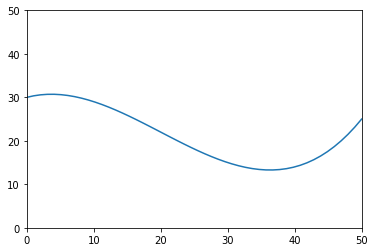

In [3]:
x = np.linspace(0, 50)
y = curve(x)

plt.figure()
plt.plot(x, y)
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

## Probability density function
\begin{align}
    \displaystyle f\left(x_{1},\ldots ,x_{K};\alpha _{1},\ldots ,\alpha _{K}\right) &= {\frac {1}{\mathrm {B} ({\boldsymbol {\alpha }})}}\prod _{i=1}^{K}x_{i}^{\alpha _{i}-1} \\
    \displaystyle \mathrm {B} ({\boldsymbol {\alpha }}) &= {\frac {\prod _{i=1}^{K}\Gamma (\alpha _{i})}{\Gamma \left(\sum _{i=1}^{K}\alpha _{i}\right)}},\qquad {\boldsymbol {\alpha }}=(\alpha _{1},\ldots ,\alpha _{K}).
\end{align}

In [4]:
def dirichlet_distribution(x, alpha):
    g = gamma(np.sum(alpha)) / np.multiply.reduce([gamma(a) for a in alpha])
    return g * np.multiply.reduce( x ** (alpha-1), axis=2 )

## 2D

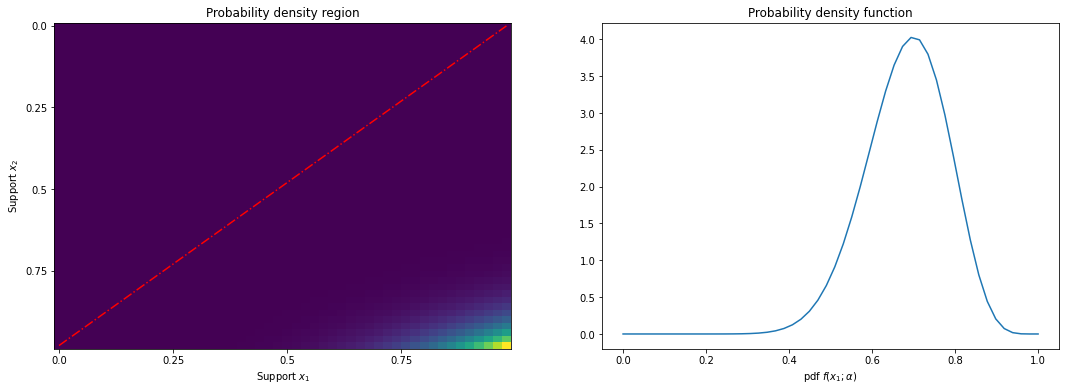

In [5]:
x = np.linspace(0.0001,1)
y = np.linspace(0.0001,1)

grid = np.array(np.meshgrid(x, y)).transpose()

d = dirichlet_distribution(grid, np.array([15.0, 7.0]))

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.title('Probability density region')
plt.imshow(d, aspect='auto')
plt.xticks(np.linspace(0,50,5), np.linspace(0,1,5))
plt.yticks(np.linspace(0,50,5), np.linspace(0,1,5))
plt.plot(np.arange(50), np.arange(49,-1,-1), 'r-.')
plt.xlabel('Support $x_1$')
plt.ylabel('Support $x_2$')

plt.subplot(1,2,2)
plt.title('Probability density function')
plt.plot(x, d[range(0,50),49-np.arange(0,50)])
plt.xlabel('pdf $f(x_1;\\alpha)$')

plt.show()

## 1D no spatial correlation
Let the [probability space](https://en.wikipedia.org/wiki/Probability_space) $(\Omega, \mathcal{F}, P)$, the [$\sigma$-algebra](https://en.wikipedia.org/wiki/%CE%A3-algebra) $\mathcal{F}$ is a [**trivial $\sigma$-algebra**](https://en.wikipedia.org/wiki/%CE%A3-algebra#Simple_set-based_examples) containing the empty set and the set $X = [0,1]$:
\begin{align}
    \Omega &\in [0, 1] \\
    T &\in \mathbb{R}^{50 \times 50} \\
    X &\in \mathbb{R}
\end{align}

In [6]:
def generate_dirichlet(i, j):
    v = curve(i)
    
    alpha1 = np.ones_like(i, dtype=np.float64)
    alpha1 = np.abs(v - 10 - j)
    alpha1 /= np.max(alpha1)
    alpha1 = 1 - alpha1
    alpha1 *= 15
    
    selector1 = v - 10 >= j
    alpha1[ selector1 ] = 15.
    
    selector2 = v + 10 < j
    alpha1[ selector2 ] = 7.
    
    alpha2 = np.ones_like(i, dtype=np.float64)
    alpha2 = np.abs(v + 10 - j)
    alpha2 /= np.max(alpha2)
    alpha2 = 1 - alpha2
    alpha2 *= 15.
    
    selector1 = v - 10 >= j
    alpha2[ selector1 ] = 7.
    
    selector2 = v + 10 < j
    alpha2[ selector2 ] = 15.
    
    return alpha1, alpha2

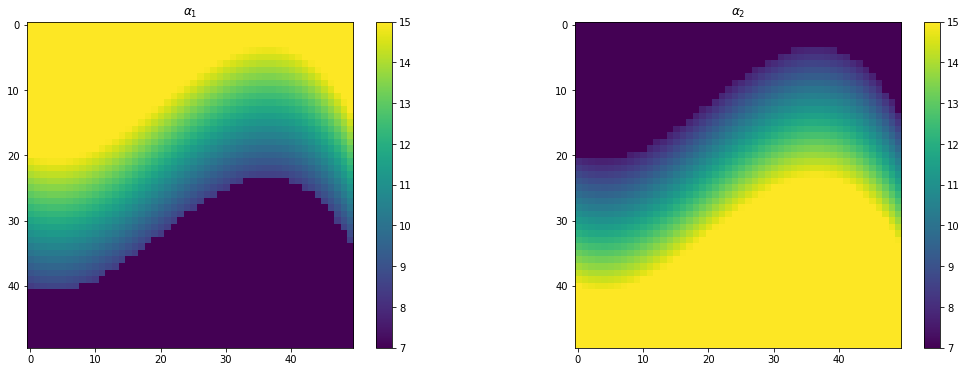

In [7]:
x = np.arange(50)
y = np.arange(50)
xx, yy = np.meshgrid(x, y)

alpha1, alpha2 = generate_dirichlet(xx, yy)

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('$\\alpha_1$')
plt.imshow(alpha1)
plt.colorbar()

plt.subplot(1,2,2)
plt.title('$\\alpha_2$')
plt.imshow(alpha2)
plt.colorbar()
plt.show()

### Realization

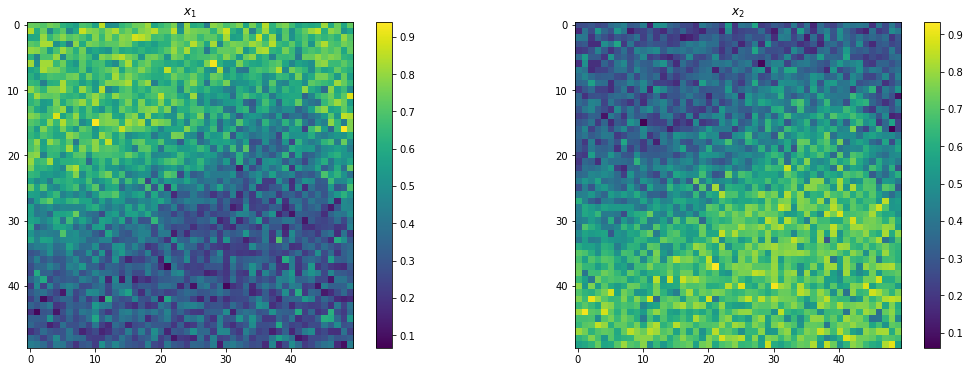

In [8]:
alpha = np.transpose([alpha1, alpha2]) # 50 x 50 x 2
sample = np.array([[np.random.dirichlet(a) for a in row] for row in alpha]).transpose()

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('$x_1$')
plt.imshow(sample[0])
plt.colorbar()

plt.subplot(1,2,2)
plt.title('$x_2$')
plt.imshow(sample[1])
plt.colorbar()

plt.show()

## 2D spatial correlation

In [18]:
def generate_dirichlet_spatial(i, j, v1=15., v2=7.):
    v = curve(i)
    
    alpha1 = np.ones_like(i, dtype=np.float64)
    alpha1 = np.abs(v - 10 - j)
    alpha1 /= np.max(alpha1)
    alpha1 = 1 - alpha1
    alpha1 *= v1
    
    selector1 = v - 10 >= j
    alpha1[ selector1 ] = v1
    
    selector2 = v + 10 < j
    alpha1[ selector2 ] = v2
    
    return alpha1

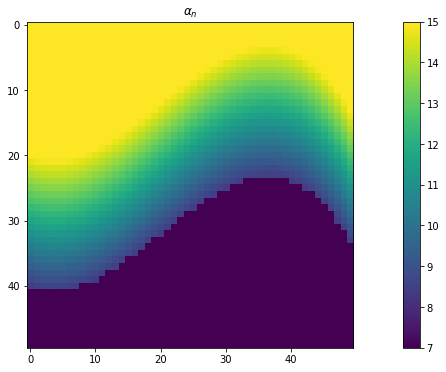

In [23]:
x = np.arange(50)
y = np.arange(50)
xx, yy = np.meshgrid(x, y)

alphan = generate_dirichlet_spatial(xx, yy, 15.0)

plt.figure(figsize=(18,6))
plt.title('$\\alpha_n$')
plt.imshow(alphan)
plt.colorbar()
plt.show()

### Realization

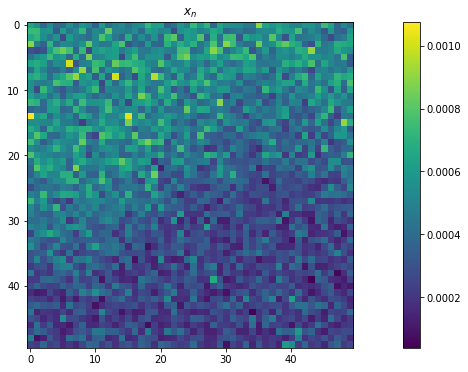

In [24]:
sample = np.random.dirichlet(alphan.flatten())

plt.figure(figsize=(18,6))
plt.title('$x_n$')
plt.imshow(sample.reshape((50,50)))
plt.colorbar()
plt.show()

## 3D

In [108]:
_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_AREA = 0.5 * 1 * 0.75**0.5
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])

# For each corner of the triangle, the pair of other corners
_pairs = [_corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    coords = np.array([tri_area(xy, p) for p in _pairs]) / _AREA
    return np.clip(coords, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                                for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).
    Arguments:
        `dist`: A distribution instance with a `pdf` method.
        `border` (bool): If True, the simplex border is drawn.
        `nlevels` (int): Number of contours to draw.
        `subdiv` (int): Number of recursive mesh subdivisions to create.
        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.triplot(_triangle, linewidth=1)

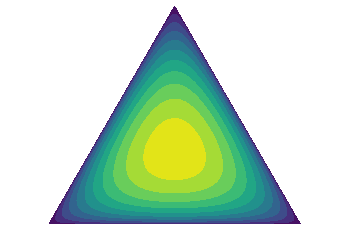

In [116]:
dist = Dirichlet([1.5, 1.5, 1.5])
draw_pdf_contours(dist, nlevels=11, subdiv=8)